In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [6]:
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [7]:
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [9]:
train = train.drop('tempDate',axis=1)

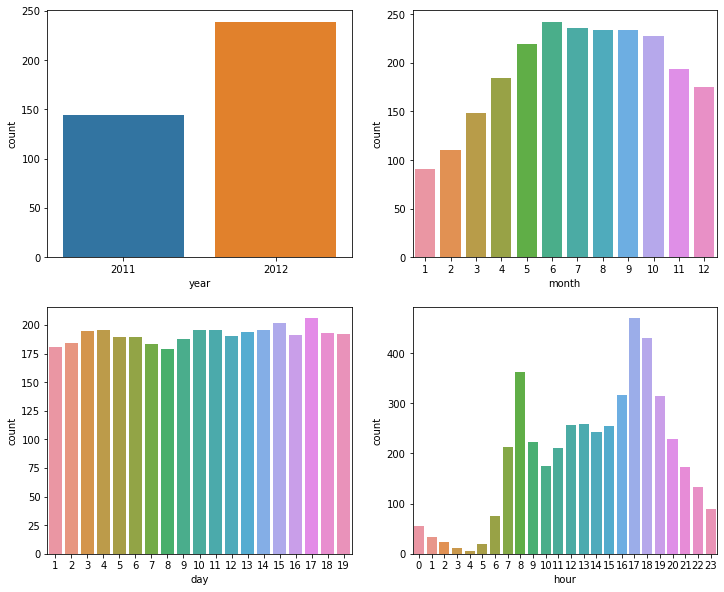

In [10]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

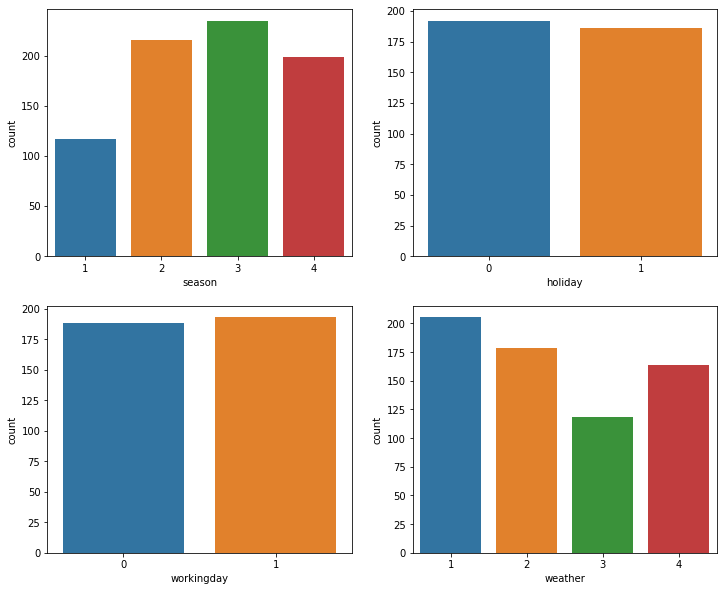

In [11]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [12]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

train['season'] = train.month.apply(badToRight)

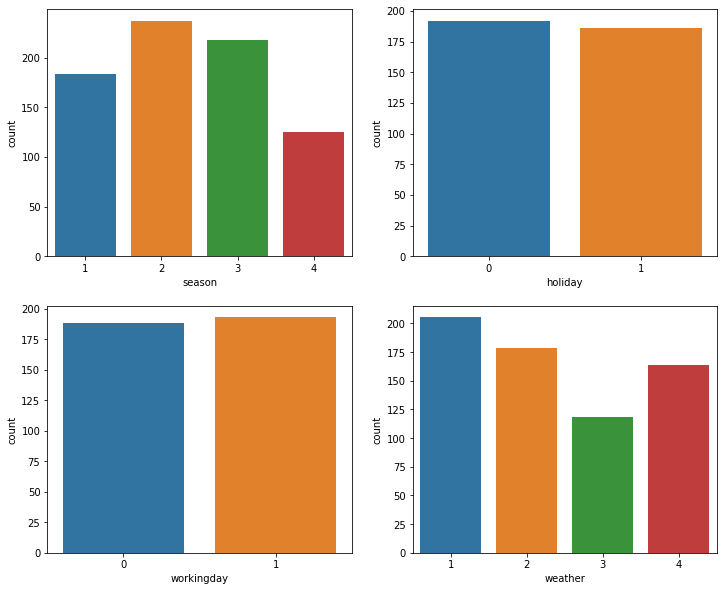

In [13]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

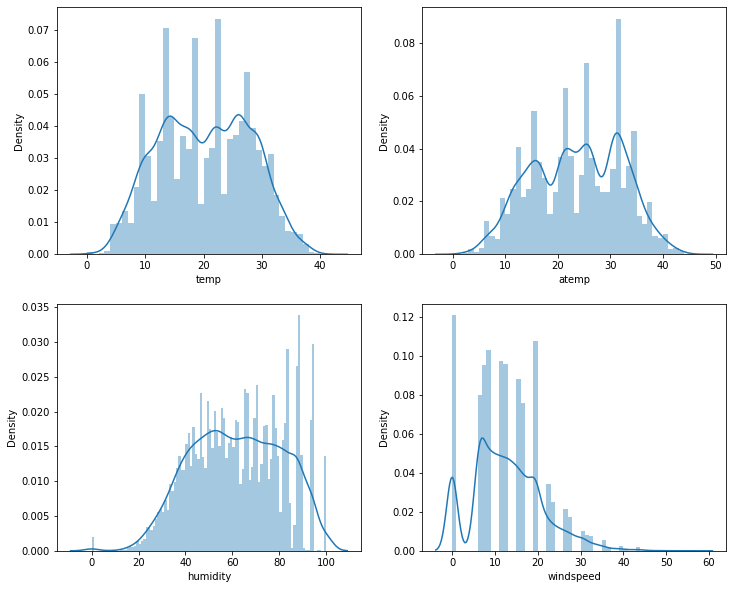

In [14]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1))

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(train.atemp.min().astype('int'),train.atemp.max().astype('int')+1))

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(train.humidity.min().astype('int'),train.humidity.max().astype('int')+1))

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(train.windspeed.min().astype('int'),train.windspeed.max().astype('int')+1))

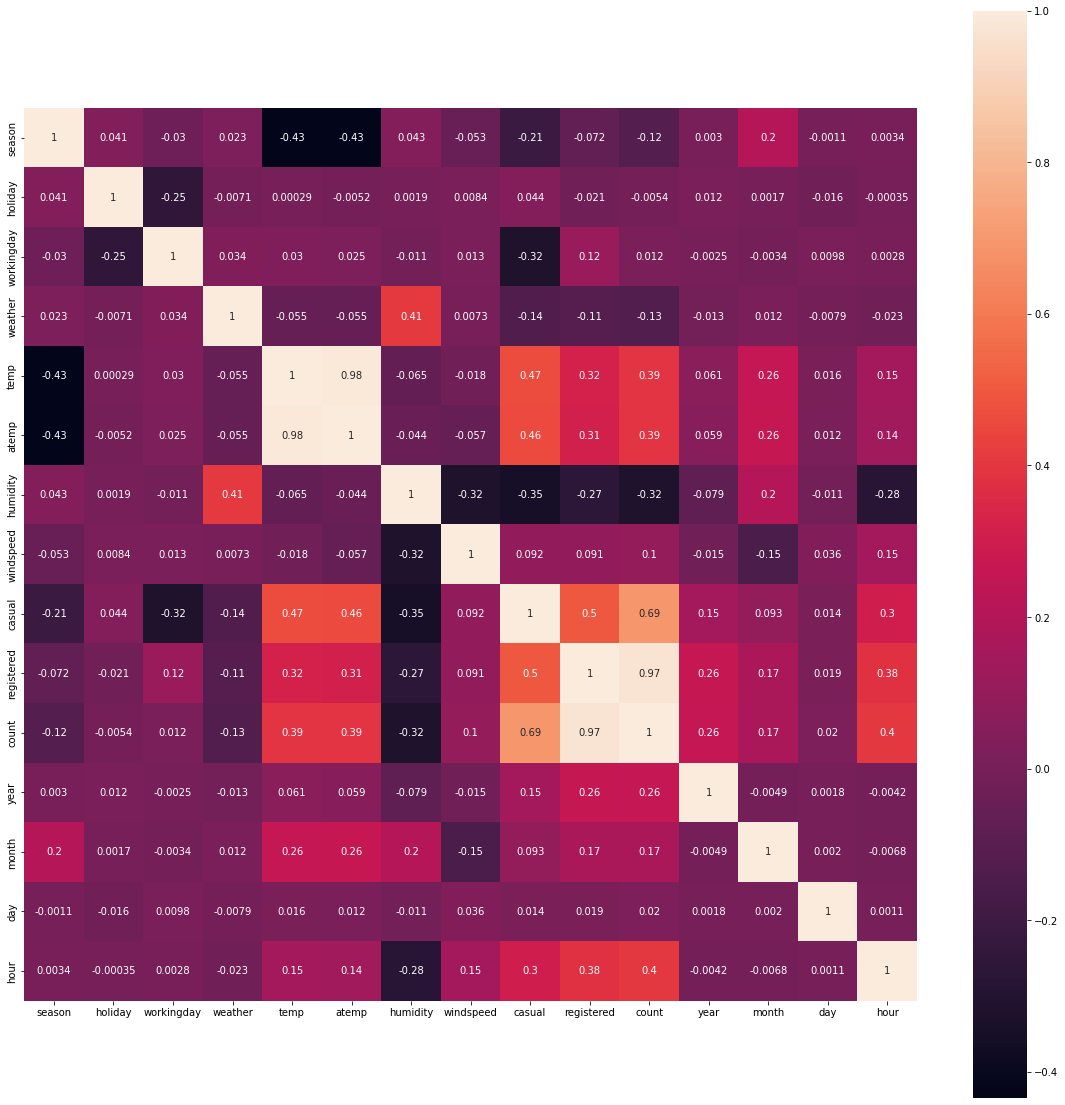

In [15]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

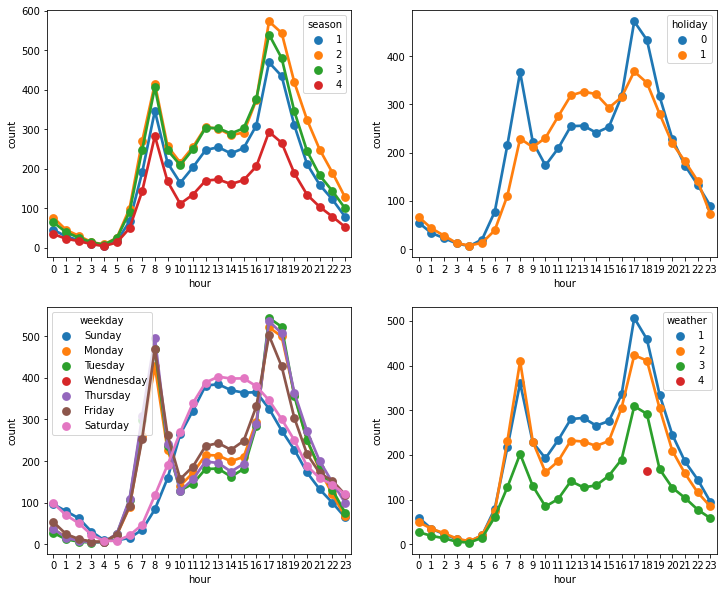

In [16]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [17]:
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


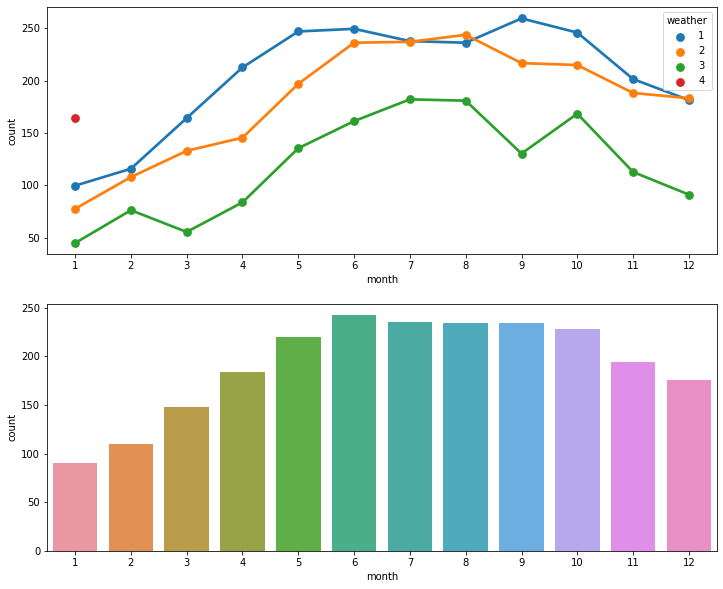

In [18]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [19]:
train['weekday']= train.weekday.astype('category')

In [20]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [21]:
train.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [22]:
from sklearn.ensemble import RandomForestRegressor

windspeed_0 = train[train.windspeed==0]
windspeed_Not0 = train[train.windspeed != 0]

windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

predicted_windspeed_0 = rf.predict(windspeed_0_df)

windspeed_0['windspeed'] = predicted_windspeed_0

c:\Users\genie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\genie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [23]:
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [24]:
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

In [25]:
train = train.sort_values(by=['datetime'])

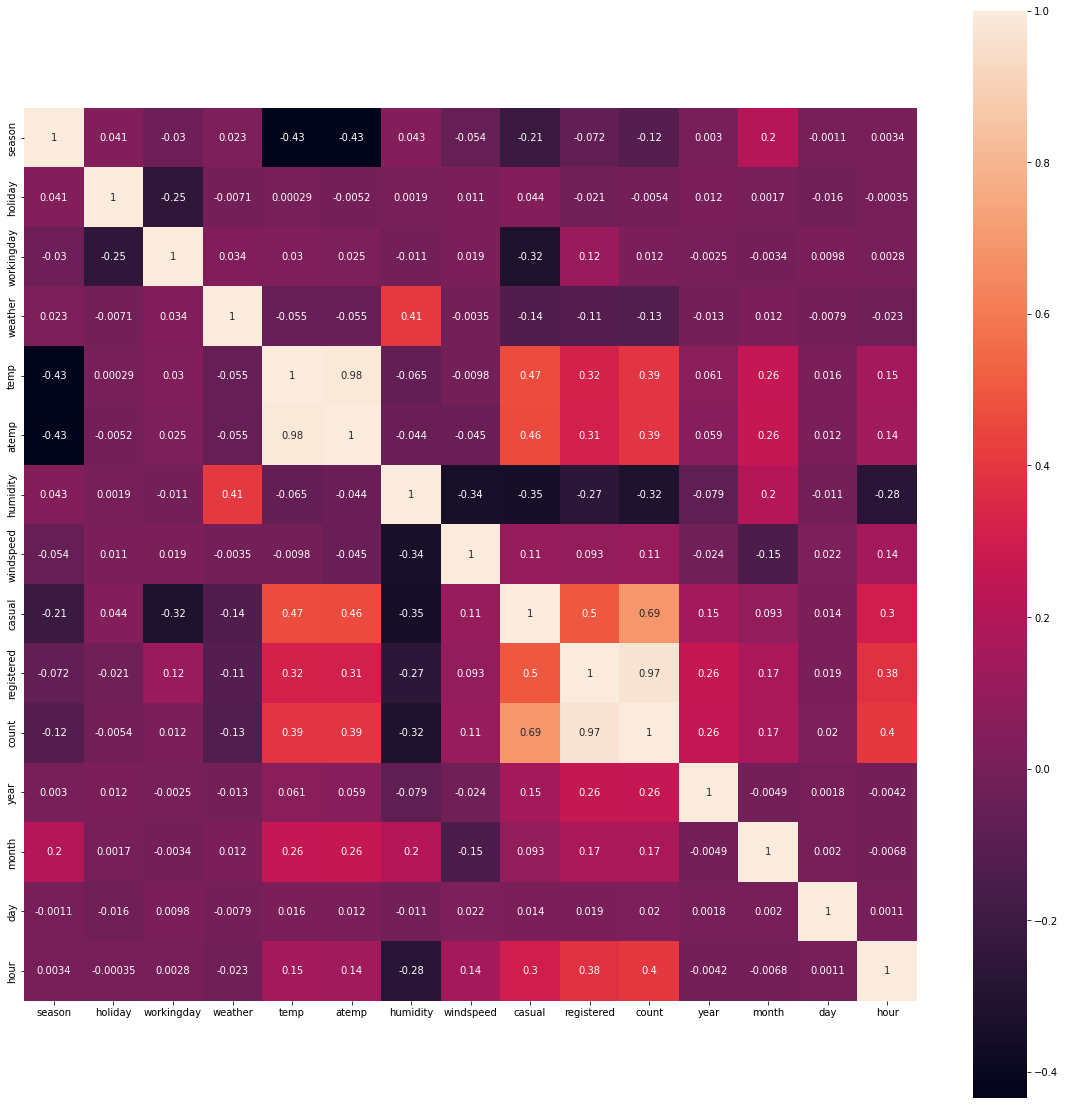

In [26]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

Min value of windspeed is 6.0032


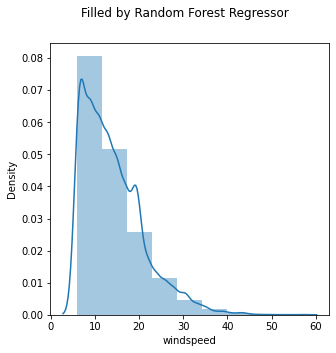

In [27]:
fig = plt.figure(figsize=[5,5])
sns.distplot(train['windspeed'],bins=np.linspace(train['windspeed'].min(),train['windspeed'].max(),10))
plt.suptitle("Filled by Random Forest Regressor")
print(f"Min value of windspeed is {train['windspeed'].min()}")